In [2]:
import numpy as np;
import pandas as pd;
import tensorflow as tf;
import matplotlib.pyplot as plt;
import matplotlib.image as mpimg;
import os;
import random;
import pathlib;

In [3]:
for dirpath,dirname,filename in os.walk('../input/children-vs-adults-images'):
    print(f"there are {len(dirname)} directories and {len(filename)} images in {dirpath}")

there are 2 directories and 0 images in ../input/children-vs-adults-images
there are 2 directories and 0 images in ../input/children-vs-adults-images/test
there are 0 directories and 60 images in ../input/children-vs-adults-images/test/adults
there are 0 directories and 60 images in ../input/children-vs-adults-images/test/children
there are 2 directories and 0 images in ../input/children-vs-adults-images/train
there are 0 directories and 340 images in ../input/children-vs-adults-images/train/adults
there are 0 directories and 340 images in ../input/children-vs-adults-images/train/children


In [4]:
data_dir=pathlib.Path('../input/children-vs-adults-images/train')
class_names=np.array(sorted(item.name for item in data_dir.glob('*')))
class_names

array(['adults', 'children'], dtype='<U8')

In [5]:
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.axis(False)
    plt.title(target_class)
    print(f"The shape of the image is {img.shape}")
   

The shape of the image is (320, 370, 3)


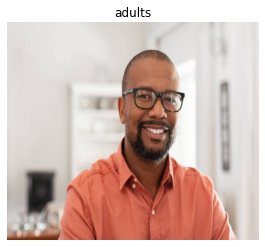

In [6]:
view_random_image(target_dir="../input/children-vs-adults-images/train/",target_class="adults")

The shape of the image is (320, 370, 3)


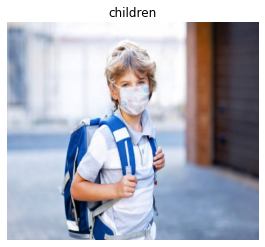

In [7]:
view_random_image(target_dir="../input/children-vs-adults-images/train/",target_class="children")

In [8]:
from keras.preprocessing.image import ImageDataGenerator;
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,rotation_range=0.2,horizontal_flip=True,
                                width_shift_range=0.2,height_shift_range=0.2,channel_shift_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)
train_dir="../input/children-vs-adults-images/train/"
test_dir="../input/children-vs-adults-images/test/"
train_data=train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),batch_size=16,class_mode="binary",seed=42,shuffle=True)
test_data=test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),batch_size=16,class_mode="binary",seed=42)

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [9]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(224,224,3),activation="relu"),
    tf.keras.layers.Conv2D(filters=32,kernel_size=5,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

2022-10-13 19:06:46.237878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 19:06:46.346630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 19:06:46.348057: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 19:06:46.350467: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model.fit(train_data,epochs=10,validation_data=(test_data))

2022-10-13 19:06:50.451642: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-13 19:06:52.305695: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


43/43 [==============================] - 27s 440ms/step - loss: 1.0692 - accuracy: 0.5059 - val_loss: 0.6940 - val_accuracy: 0.5167
Epoch 2/10
43/43 [==============================] - 11s 249ms/step - loss: 0.6908 - accuracy: 0.5162 - val_loss: 0.7045 - val_accuracy: 0.5583
Epoch 3/10
43/43 [==============================] - 11s 266ms/step - loss: 0.6889 - accuracy: 0.5176 - val_loss: 0.7202 - val_accuracy: 0.4917
Epoch 4/10
43/43 [==============================] - 11s 244ms/step - loss: 0.7009 - accuracy: 0.5206 - val_loss: 0.6915 - val_accuracy: 0.4917
Epoch 5/10
43/43 [==============================] - 11s 248ms/step - loss: 0.6921 - accuracy: 0.4618 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 6/10
43/43 [==============================] - 11s 259ms/step - loss: 0.6897 - accuracy: 0.4985 - val_loss: 0.6862 - val_accuracy: 0.5333
Epoch 7/10
43/43 [==============================] - 11s 245ms/step - loss: 0.6892 - accuracy: 0.5500 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 8/10

In [ ]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_data)).prefetch(tf.data.AUTOTUNE)
test_dataset=tf.data.Dataset.from_tensor_slices((test_data)).prefetch(tf.data.AUTOTUNE)

In [33]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.applications.ResNet50V2(include_top=False,input_shape=(224,224,3),weights='imagenet'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [34]:
model_2.layers[0].trainable=False

In [35]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_7 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 100353    
Total params: 23,665,153
Trainable params: 100,353
Non-trainable params: 23,564,800
_________________________________________________________________


In [38]:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model_2.fit(train_data,epochs=10,validation_data=(test_data))

Epoch 1/10
43/43 [==============================] - 15s 276ms/step - loss: 2.2548 - accuracy: 0.6912 - val_loss: 3.4654 - val_accuracy: 0.7250
Epoch 2/10
43/43 [==============================] - 11s 255ms/step - loss: 1.8220 - accuracy: 0.7956 - val_loss: 3.2578 - val_accuracy: 0.7167
Epoch 3/10
43/43 [==============================] - 11s 263ms/step - loss: 2.1318 - accuracy: 0.7971 - val_loss: 3.5833 - val_accuracy: 0.6833
Epoch 4/10
43/43 [==============================] - 11s 255ms/step - loss: 1.4192 - accuracy: 0.8397 - val_loss: 4.7098 - val_accuracy: 0.7250
Epoch 5/10
43/43 [==============================] - 11s 252ms/step - loss: 1.5256 - accuracy: 0.8500 - val_loss: 3.1203 - val_accuracy: 0.7500
Epoch 6/10
43/43 [==============================] - 12s 269ms/step - loss: 1.3998 - accuracy: 0.8559 - val_loss: 3.5328 - val_accuracy: 0.7833
Epoch 7/10
43/43 [==============================] - 11s 259ms/step - loss: 1.7090 - accuracy: 0.8397 - val_loss: 5.1016 - val_accuracy: 0.7333

In [49]:
def load_and_prep(filename):
    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img)
    img=tf.image.resize(img,size=[224,224])
    img=img/255.
    return img

In [50]:
def pred_and_plot(model,filename,class_names=class_names):
    img=load_and_prep(filename)
    pred=model.predict(tf.expand_dims(img,axis=0))
    pred_class=class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"prediction:{pred_class}")
    print(pred)
    

[[1.]]


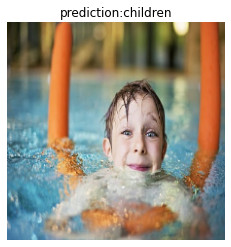

In [51]:
pred_and_plot(model_2,filename="../input/children-vs-adults-images/train/children/114.jpg")

[[2.3484757e-13]]


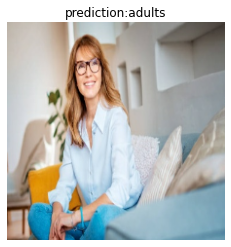

In [56]:
pred_and_plot(model_2,filename="../input/children-vs-adults-images/test/adults/20.jpg")

[[1.]]


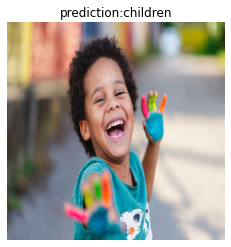

In [64]:
pred_and_plot(model_2,filename="../input/image1/istockphoto-1207261035-612x612.jpg")